# PitcherBall - Exploring Major League Baseball Pitcher Data: What Can We Discover?


### By: The Group 3 Times: Sam, Hadrianna, Katie, John, Jonah

<img src="https://pbs.twimg.com/media/FFpyFFTVIAIvuGI?format=jpg&name=medium">

## Introduction

### Prologue: 

One of the most valuable assets in all of sports is a quality starting pitcher. More than a star quarterback or a stud point guard, a true ace pitcher can almost entirely dictate a win or a loss for his team. Finding these excellent  pitchers can be difficult to find though - they don't exact grow on trees. We have set out to discover attributes and factors lead to MLB pitcher success. Are there certain factors that correlate more to success than others? What should a team be looking for when analyzing a pitcher? We are on a mission to identify those factors. 


Luckily, baseball is a data-rich sport. Via baseballsavant.com, there is ample data that gives us the opportunity to identify trends among various pitchers.

### The Set-Up:
To begin we made a classification - we are dividing pitchers into three broad types: starters, relievers, and closers. 

For those less familiar with baseball the Group 3 Times has provided the following definitions:
A starter - pitches every 5 days, usually throws 80-100 pitches across 5 innings. 
Relievers - pitches every 2-3 days, usually throws 20-30 pitches across 1-2 innings. 
Closers - usually throws 10-20 pitches in 1 inning, the 9th inning. 

If you're feelin frisky, you can follow along at home, as below we detail how we filtered he category via baseballsavant.com

<img src="https://pbs.twimg.com/media/FFp6hZLVcAAm7Ci?format=jpg&name=large">


## Import & Load the Data

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

pd.set_option('display.max_columns', None)
SP_df = pd.read_csv('../data/Project_Data_Files/Project_Starters.csv')
RP_df = pd.read_csv('../data/Project_Data_Files/Project_Relievers.csv')
CP_df = pd.read_csv('../data/Project_Data_Files/Project_Closers.csv')

RP_df['absolute_value_horizontal_release_point'] = RP_df['horizontal_release_point'].abs()
SP_df['absolute_value_horizontal_release_point'] = SP_df['horizontal_release_point'].abs()
CP_df['absolute_value_horizontal_release_point'] = CP_df['horizontal_release_point'].abs()

## Previewing the Data

Before we apply the ["Start Big and Drill Down Approach"](http://mediashift.org/2015/06/exploring-the-7-different-types-of-data-stories/) let's give you a taste for the data we are working with:

In [34]:
SP_df.head(3)

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,horizontal_release_point,vertical_release_point,absolute_value_horizontal_release_point
0,1893,571760,"Heaney, Andrew",2330,81.2,0.236,0.231,0.273,0.467,0.327,0.295,0.214,95,403,88.9,18.6,2399,87.6,87.03,265,916,977,-0.6,6.11,111,155,118,147,303,325,293,3.41,5.31,3.41
1,2566,640455,"Manaea, Sean",2980,86.1,0.256,0.157,0.324,0.414,0.309,0.316,0.256,153,597,89.9,12.3,1848,89.0,90.03,364,1317,1249,1.0,7.18,110,151,120,150,301,326,299,3.31,5.65,3.31
2,1971,518516,"Bumgarner, Madison",2294,85.9,0.247,0.192,0.280,0.439,0.315,0.322,0.247,116,469,88.6,18.8,2318,85.7,85.77,215,970,1001,0.1,6.55,109,153,118,149,300,327,296,3.26,5.70,3.26


In [35]:
RP_df.head(3)

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,horizontal_release_point,vertical_release_point,absolute_value_horizontal_release_point
0,900,518617,"Diekman, Jake",1118,80.5,0.217,0.211,0.287,0.428,0.330,0.327,0.217,39,180,89.1,15.5,2386,91.2,88.51,143,391,509,-2.7,6.34,111,150,120,150,300,326,301,3.27,5.72,3.27
1,944,608718,"Suter, Brent",1221,77.3,0.256,0.163,0.294,0.419,0.319,0.312,0.246,55,215,84.4,6.7,2144,85.9,86.61,93,461,483,0.7,7.12,108,153,118,147,300,324,299,2.82,6.21,2.82
2,851,656945,"Scott, Tanner",1032,82.5,0.249,0.142,0.330,0.391,0.334,0.337,0.241,42,169,90.7,6.9,2620,92.3,92.09,136,373,478,-0.2,6.20,108,151,117,148,300,323,294,2.50,5.53,2.50


In [36]:
CP_df.head(3)

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,horizontal_release_point,vertical_release_point,absolute_value_horizontal_release_point
0,876,623352,"Hader, Josh",964,90.9,0.125,0.057,0.227,0.182,0.202,0.238,0.157,22,176,87.4,22.2,2137,92.1,87.26,195,440,436,-4.8,6.65,110,153,117,148,306,327,302,3.17,5.22,3.17
1,603,543272,"Hand, Brad",1076,56.0,0.188,0.143,0.213,0.331,0.275,0.321,0.241,25,133,85.6,15.4,2346,87.4,86.04,52,244,359,-1.4,5.57,110,152,115,149,304,323,296,2.46,6.22,2.46
2,747,642397,"Soto, Gregory",1131,66.0,0.204,0.172,0.240,0.376,0.307,0.317,0.212,32,157,89.0,13.1,2378,94.7,95.23,101,344,403,0.5,6.76,108,153,118,149,299,328,299,1.98,5.64,1.98


### Data Observations:

* There are 165 starters...
* ENTER HERE
* ENTER HERE
* ENTER HERE

## Start Big And Drill Down: Pitcher Type Data Analysis 

Wow. That's a lot of data. There's a lot of metrics that could be looked at here. We're going to narrow it down to three big factors that we're going to look for correlation for within each pitcher category.


1) Release Extension and Batting Average

2) Horizontal Release Point and Exit Velocity

3) Velocity and Whiffs


Note that each pairing has an input and an output. As in, the pitcher could throw with a higher velocity or a lower velocity and that would result in more or less whiffs (more on whiffs later).

### Block 1: Release Extension and Batting Average

Input: [**Release Extension**](https://www.mlb.com/glossary/statcast/extension)  - Release extension of pitch in feet as tracked by Statcast.

A pitcher must begin his throwing motion while standing on the pitching rubber -- which is 60 feet, 6 inches away from home plate. This does not mean pitches are actually thrown from 60 feet, 6 inches away from the plate.


The point at which a pitcher releases the ball is actually a few feet closer to home plate than the pitching rubber itself. Extension quantifies exactly how much closer a pitcher's release point is to home plate. Taller pitchers with long wingspans tend to have the longest Extensions, because their frames allow them to hold on to the ball for a greater distance before releasing it.


Not surprisingly, a longer Extension can be a major advantage to pitchers, because they are essentially shortening the distance between themselves and opposing batters. A pitcher with a longer Extension can make a 93 mph fastball look like a 96 mph fastball.




Output: **Batting Average**

One of the oldest and most universal tools to measure a hitter's success at the plate, batting average is determined by dividing a player's hits by his total at-bats for a number between zero (shown as .000) and one (1.000). In recent years, the league-wide batting average has typically hovered around .250.



#### Correlation with Starters

In [37]:
#Code

#### Correlation with Relievers

In [ ]:
#Code

#### Correlation with Closers

In [38]:
#Code

#### Compare all three
* Which one has the best correlation?
* What gives way to more success?
* Who are the outliers?

In [ ]:
#Code

#### Take-Away(s)
* Trend 1 
* Trend 2

In [39]:
#Code

### Block 2: Horizontal Release Point and Exit Velocity

Highlight Contrasts


Input: Horizontal Release Point  - Horizontal Release Position of the ball measured in feet from the catcher's perspective.


<img src="https://pbs.twimg.com/media/FFqKGsJaQAAT1bV?format=jpg&name=large">


Output: **Exit Velocity** - aka launch speed

Exit Velocity measures the speed of the baseball as it comes off the bat, immediately after a batter makes contact. This is tracked for all Batted Ball Events -- outs, hits and errors.

Attaining a high Exit Velocity is one of a hitter's primary goals. A hard-hit ball won't always have a positive result, but the defense has less time to react, so the batter's chances of reaching base are higher.

For this very reason, Exit Velocity can also be used to evaluate pitchers. The game's best pitchers -- who naturally throw the highest quality pitches -- generally rank among the league leaders at limiting hard contact.


<em>Exit Velocity Note: Keeping in mind that the smaller the velocity number, the more effective the pitcher, because a pitcher's goal is to have the batter hit very slow balls that are easy to catch (or to strike out).</em>

In [4]:
# Create bins with each horizontal release point
bins = pd.cut(SP_df['absolute_value_horizontal_release_point'], [
    0, 1, 2, 3, 4])

# Group the dataframe by bins with respect to launch speed and take the average
speedbyreleasepoint = SP_df.groupby(bins)['launch_speed'].mean()
print('Launch speed in bins by horizontal release point')
speedbyreleasepoint

Launch speed in bins by horizontal release point


absolute_value_horizontal_release_point
(0, 1]    88.546667
(1, 2]    88.054023
(2, 3]    87.880000
(3, 4]    88.125000
Name: launch_speed, dtype: float64

[Text(0.5, 1.0, 'SP - Horizontal Release Point (ft) vs Launch Speed')]

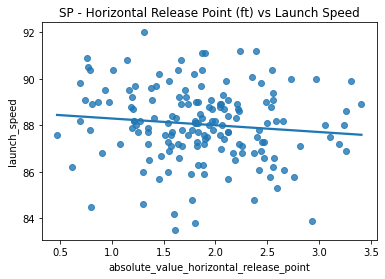

In [5]:
sns.regplot(x="absolute_value_horizontal_release_point", y="launch_speed", ci=None, data = SP_df).set(title = 'SP - Horizontal Release Point (ft) vs Launch Speed')

In [6]:
# Create filter where the horizontal release point is between 0 and 1 ft
filt1 = SP_df["absolute_value_horizontal_release_point"] > 0
filt2 = SP_df["absolute_value_horizontal_release_point"] <= 1

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween0and1 = SP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Launch speed of starters who threw with a horizontal release point between 0 and 1ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween0and1)
print()

Launch speed of starters who threw with a horizontal release point between 0 and 1ft
------------------------------------------------------------------------------------
player_name
Burnes, Corbin       84.5
Gray, Sonny          86.2
Buehler, Walker      86.8
Means, John          87.6
Minor, Mike          87.8
Civale, Aaron        88.2
Morgan, Eli          88.9
Peterson, David      89.0
Weaver, Luke         89.0
Flexen, Chris        89.1
Lyles, Jordan        89.5
Jax, Griffin         89.8
Zimmermann, Bruce    90.4
Plesac, Zach         90.5
McClanahan, Shane    90.9
Name: launch_speed, dtype: float64



In [7]:
# Create filter where the horizontal release point is between 3 and 4 ft
filt1 = SP_df["absolute_value_horizontal_release_point"] > 3
filt2 = SP_df["absolute_value_horizontal_release_point"] <= 4

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween3and4 = SP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Launch speed of starters who threw with a horizontal release point between 3 and 4 ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween3and4)
print()

Launch speed of starters who threw with a horizontal release point between 3 and 4 ft
-------------------------------------------------------------------------------------
player_name
Scherzer, Max         86.9
Mills, Alec           87.2
Lynn, Lance           87.5
Berríos, José         88.0
Gallen, Zac           88.0
Bumgarner, Madison    88.6
Heaney, Andrew        88.9
Manaea, Sean          89.9
Name: launch_speed, dtype: float64



As you can see by the breakdown of pitchers that fit into the two end bins, there are some outliers, such as Corbin Burnes and Sean Manaea.

#### Relievers

In [8]:
# Create bins with each horizontal release point
bins = pd.cut(RP_df['absolute_value_horizontal_release_point'], [
    0, 1, 2, 3, 4])

# Group the dataframe by bins with respect to launch speed and take the average
speedbyreleasepoint = RP_df.groupby(bins)['launch_speed'].mean()
print('Launch speed in bins by horizontal release point')
speedbyreleasepoint

Launch speed in bins by horizontal release point


absolute_value_horizontal_release_point
(0, 1]    87.814286
(1, 2]    87.623810
(2, 3]    87.465000
(3, 4]    86.420000
Name: launch_speed, dtype: float64

When looking at relievers, when the absolute value of the horizontal release point is between 0 and 1, the average launch speed is 87.81 mph. When the absolute value of the horizontal release point is between 1 and 2, the average launch speed is 87.62 mph. When the absolute value of the horizontal release point is between 2 and 3, the average launch speed is 87.47 mph. When the absolute value of the horizontal release point is between 3 and 4, the average launch speed is 86.84 mph. This data indicates that there is a negative relationship between horizontal release point and launch speed: as horizontal release point increases, launch speed decreases. As you can see by the graph below, while the line of best fit is slightly steeper, there are a lot more outliers, indicating that there is less correlation between horizontal release point and launch speed among relievers.

[Text(0.5, 1.0, 'RP - Horizontal Release Point (ft) vs Launch Speed')]

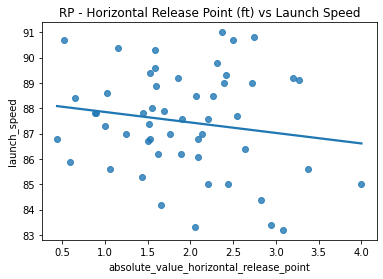

In [9]:
sns.regplot(x="absolute_value_horizontal_release_point", y="launch_speed", ci=None, data = RP_df).set(title = 'RP - Horizontal Release Point (ft) vs Launch Speed')

In [10]:
# Create filter where the horizontal release point is between 0 and 1 ft
filt1 = RP_df["absolute_value_horizontal_release_point"] > 0
filt2 = RP_df["absolute_value_horizontal_release_point"] <= 1

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween0and1 = RP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Launch speed of relievers who threw with a horizontal release point between 0 and 1ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween0and1)
print()

Launch speed of relievers who threw with a horizontal release point between 0 and 1ft
-------------------------------------------------------------------------------------
player_name
Thielbar, Caleb    85.9
Luetge, Lucas      86.8
Holmes, Clay       87.3
Alvarado, José     87.8
Bass, Anthony      87.8
Kinley, Tyler      88.4
Stanek, Ryne       90.7
Name: launch_speed, dtype: float64



In [11]:
# Create filter where the horizontal release point is between 3 and 4 ft
filt1 = RP_df["absolute_value_horizontal_release_point"] > 3
filt2 = RP_df["absolute_value_horizontal_release_point"] <= 4

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween3and4 = RP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Launch speed of relievers who threw with a horizontal release point between 3 and 4 ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween3and4)
print()

Launch speed of relievers who threw with a horizontal release point between 3 and 4 ft
--------------------------------------------------------------------------------------
player_name
Treinen, Blake    83.2
Rogers, Tyler     85.0
Cishek, Steve     85.6
Diekman, Jake     89.1
Shaw, Bryan       89.2
Name: launch_speed, dtype: float64



As you can see by the breakdown of pitchers that fit into the two end bins, there are some outliers, such as Caleb Thielbar and Bryan Shaw.

#### Closers

In [12]:
# Create bins with each horizontal release point
bins = pd.cut(CP_df['absolute_value_horizontal_release_point'], [
    0, 1, 2, 3, 4])

# Group the dataframe by bins with respect to launch speed and take the average
speedbyreleasepoint = CP_df.groupby(bins)['launch_speed'].mean()
print('Launch speed in bins by horizontal release point')
speedbyreleasepoint

Launch speed in bins by horizontal release point


absolute_value_horizontal_release_point
(0, 1]    89.157143
(1, 2]    88.723529
(2, 3]    87.490909
(3, 4]    85.633333
Name: launch_speed, dtype: float64

When looking at closers, when the absolute value of the horizontal release point is between 0 and 1, the average launch speed is 89.15 mph. When the absolute value of the horizontal release point is between 1 and 2, the average launch speed is 88.73 mph. When the absolute value of the horizontal release point is between 2 and 3, the average launch speed is 87.49 mph. When the absolute value of the horizontal release point is between 3 and 4, the average launch speed is 85.63 mph. This data indicates that there is a slightly stronger negative relationship between horizontal release point and launch speed, which is evident by the steeper line of best fit in the graph.

[Text(0.5, 1.0, 'CP - Horizontal Release Point (ft) vs Launch Speed')]

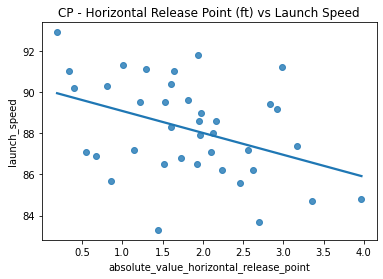

In [13]:
sns.regplot(x="absolute_value_horizontal_release_point", y="launch_speed", ci=None, data = CP_df).set(title = 'CP - Horizontal Release Point (ft) vs Launch Speed')

In [14]:
# Create filter where the horizontal release point is between 0 and 1 ft
filt1 = CP_df["absolute_value_horizontal_release_point"] > 0
filt2 = CP_df["absolute_value_horizontal_release_point"] <= 1

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween0and1 = CP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Launch speed of closers who threw with a horizontal release point between 0 and 1ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween0and1)
print()

Launch speed of closers who threw with a horizontal release point between 0 and 1ft
-----------------------------------------------------------------------------------
player_name
Castillo, Diego     85.7
Clase, Emmanuel     86.9
Chapman, Aroldis    87.1
Pressly, Ryan       90.2
Robles, Hansel      90.3
Karinchak, James    91.0
Holland, Greg       92.9
Name: launch_speed, dtype: float64



In [15]:
# Create filter where the horizontal release point is between 3 and 4 ft
filt1 = CP_df["absolute_value_horizontal_release_point"] > 3
filt2 = CP_df["absolute_value_horizontal_release_point"] <= 4

# Subset the data to run the players within that filter and sort that list by launch speed
launchspeedbetween3and4 = CP_df[filt1 & filt2].groupby('player_name')['launch_speed'].mean().sort_values()

# Print list
title1='Launch speed of closers who threw with a horizontal release point between 3 and 4 ft'
print(title1)
print('-'*len(title1))
print(launchspeedbetween3and4)
print()

Launch speed of closers who threw with a horizontal release point between 3 and 4 ft
------------------------------------------------------------------------------------
player_name
Floro, Dylan     84.7
Rogers, Tyler    84.8
Hader, Josh      87.4
Name: launch_speed, dtype: float64



As you can see by the breakdown of pitchers that fit into the two end bins, there are some outliers, such as Diego Castillo and Josh Hader.  

## Takeaway

Based on the data, horizontal release point is not that big of an indicator of pitcher success, but it is more of an indicator among closers and relievers than starters. For both closers and relievers, having a higher horizontal release point tends to lead to a higher launch speed, making them more effective and successful pitchers. That being said, there are some outliers: including for starters, Corbin Burnes and Sean Manaea; for relievers, Caleb Thielbar and Bryan Shaw; and for closers: Diego Castillo and Josh Hader.

### Block 3: Pitch Velocity and Whiffs

Input: **Pitch Velocity** - Pitch Velocity: How hard, in miles per hour, a pitch is thrown.

Output: **Whiffs** - A swinging strike (referring to the bat whiffing through the air without contacting the ball).

#### Correlation with Starters

In [40]:
#Code

#### Correlation with Relievers

In [41]:
#Code

#### Correlation with Closers

In [42]:
#Code

#### Compare all three
* Which one has the best correlation?
* What gives way to more success?
* Who are the outliers?

#### Take-Away(s)
* Highest correlation between velocity and whiffs exist within closers
* Other trends?

## Profile The Outliers: Player Data Analysis


<img src="https://bycommonconsent.files.wordpress.com/2020/12/129513453_10222479920685783_166458902919141143_n.jpg?w=640
">



What’s making them successful cause it’s not what usually makes their pitcher type successful?
How are they defying the trend and still successful?

***RUN EACH OF THESE TESTS FOR EACH PLAYER***
Template for metrics to check in on:
EX: _____ → Thus this could potentially be the reason making him successful despite being unique. 

***USE SAM AND KATIE’S NOTEBOOK’S AS REFERENCE***

Outlying Players:
_____ (Starter)
_____ (Starter)
_____ (Starter)
Sergio Romo (Reliever)
_____ (Reliever)
Tyler Rogers (Reliever)
Aroldis Chapman (Closer)
Craig Kimbrel (Closer)
Kenley Jansen (Closer)

In [17]:
# Load player datasets

Chapman_df = pd.read_csv('../data/Project_Data_Files/Project_AroldisChapman.csv')
Jansen_df = pd.read_csv('../data/Project_Data_Files/Project_KenleyJansen.csv')
Romo_df = pd.read_csv('../data/Project_Data_Files/Project_SergioRomo.csv')
Rogers_df = pd.read_csv('../data/Project_Data_Files/Project_TylerRogers.csv')
Kimbrel_df = pd.read_csv('../data/Project_Data_Files/ProjectCraigKimbrel.csv')

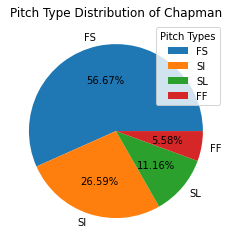

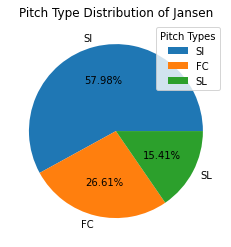

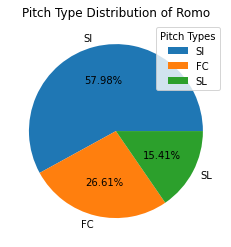

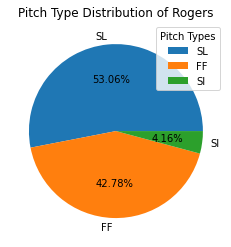

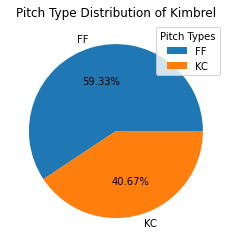

In [18]:
# Check pitch type [KATIE]

###########
# CHAPMAN #
###########
chap_pitch_type_vals = Chapman_df["pitch_type"].value_counts()
chap_pitch_types = Chapman_df["pitch_type"].unique()

chap_plot = plt.pie(chap_pitch_type_vals, labels = chap_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Chapman')
plt.legend(title = "Pitch Types")
plt.show()

##########
# JANSEN #
##########
jan_pitch_type_vals = Jansen_df["pitch_type"].value_counts()
jan_pitch_types = Jansen_df["pitch_type"].unique()

jan_plot = plt.pie(jan_pitch_type_vals, labels = jan_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Jansen')
plt.legend(title = "Pitch Types")
plt.show()

########
# ROMO #
########
romo_pitch_type_vals = Jansen_df["pitch_type"].value_counts()
romo_pitch_types = Jansen_df["pitch_type"].unique()

romo_plot = plt.pie(romo_pitch_type_vals, labels = romo_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Romo')
plt.legend(title = "Pitch Types")
plt.show()

##########
# ROGERS #
##########
rog_pitch_type_vals = Rogers_df["pitch_type"].value_counts()
rog_pitch_types = Rogers_df["pitch_type"].unique()

rog_plot = plt.pie(rog_pitch_type_vals, labels = rog_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Rogers')
plt.legend(title = "Pitch Types")
plt.show()

###########
# KIMBREL #
###########
kim_filter = Kimbrel_df['pitch_type'].isna() == False 
kim_df = Kimbrel_df[kim_filter]

kim_pitch_type_vals = kim_df["pitch_type"].value_counts()
kim_pitch_types = kim_df["pitch_type"].unique()

kim_plot = plt.pie(kim_pitch_type_vals, labels = kim_pitch_types, autopct='%1.2f%%')
plt.title('Pitch Type Distribution of Kimbrel')
plt.legend(title = "Pitch Types")
plt.show()

<div class="alert alert-warning">

#### Aaaaaaah! Lets not use pie charts for something like this!
  
* Although common there are very few places where pie charts communicate very clearly there are much better and more concise options
    
* Instead you can use a stacked bar plot with one column per player
    

  
</div>

In [19]:

players = ['Chapman', 'Jansen', 'Romo', 'Rogers', 'Kimbrel']
player_dfs = [Chapman_df, Jansen_df, Romo_df, Rogers_df, Kimbrel_df]

pitch_data = []
for player, pdf in zip(players, player_dfs):
        df=pdf["pitch_type"].value_counts(normalize=True).to_frame()
        df['player']=player
        pitch_data.append(df)

pitch_data_df = pd.concat(pitch_data)

pitch_data_df=pitch_data_df.reset_index()
pitch_data_df.rename(columns={'index': 'pitch_type',
                              'pitch_type': 'value'}, inplace=True)


In [20]:
pitch_by_player=pitch_data_df.pivot(index='player', columns='pitch_type', values='value')

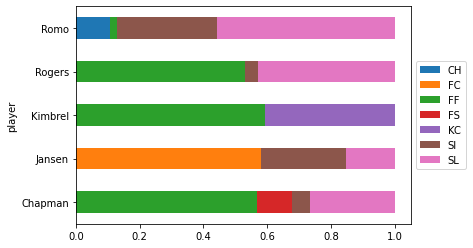

In [21]:
pitch_by_player.plot(kind='barh', 
                     stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

6.07    40
6.08    40
6.05    37
6.11    37
6.06    36
        ..
6.42     1
6.38     1
6.44     1
5.82     1
5.79     1
Name: release_pos_z, Length: 62, dtype: int64


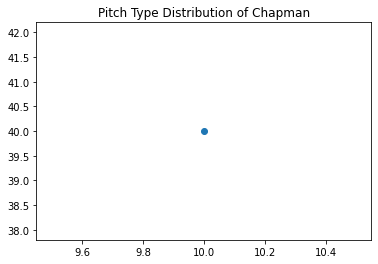

In [22]:
# Check vertical release point - Katie

###########
# CHAPMAN #
###########
chap_release_vals = Chapman_df["release_pos_z"].value_counts()
chap_release_types = Chapman_df["release_pos_z"].unique()
print(chap_release_vals)
chap_plot = plt.scatter(x=10, y=40, data=chap_release_vals)
plt.title('Pitch Type Distribution of Chapman')
#plt.legend(title = "Pitch Types")
plt.show()

In [23]:
# Strike throwing percentage - Sam

In [24]:
# Length of at-bat - Sam

## Conclusion 

Conclusion here

In [46]:
ls -l

total 13156
-rw-rw-rw- 1 hlowenkron    hlowenkron    6422864 Nov 15 22:29  Data_collection_and_initial_exploration.ipynb
-rw-rw-rw- 1 katie-collier katie-collier  223644 Dec  3 05:24  Final_Cleaned_Notebook.ipynb
-rw-rw-rw- 1 hlowenkron    hlowenkron      51997 Dec  2 22:04  Hadriana_Assignment_Step_2.ipynb
-rw-rw-rw- 1 hlowenkron    hlowenkron     189520 Nov 18 21:21  Hadriana_Relief_data_collection_and_initial_exploration.ipynb
-rw-rw-rw- 1 jreum7        jreum7          74840 Dec  1 21:49  John_Reum_Assignment_Step_2.ipynb
-rw-rw-rw- 1 jreum7        jreum7        3857605 Nov 24 06:07 'John Reum_Closers_data_collection_and_initial_exploration.ipynb'
-rw-rw-rw- 1 jonahcharlton jonahcharlton   81605 Dec  1 22:03  Jonah_Charlton_Assignment_Step_2.ipynb
-rw-rw-rw- 1 jonahcharlton jonahcharlton  456581 Nov 22 21:51  Jonah_Starters_data_collection_and_initial_exploration.ipynb
-rw-rw-rw- 1 katie-collier katie-collier 1543188 Nov 18 19:25  Katie_Player_Data_Ralph_Data_collection_and_initial_